In [292]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [293]:
#Read data

dataset = pd.read_csv('raw-data\\titanic-dataset.csv')
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [294]:
#Remove columns not necessary for analysing
dataset = dataset.drop(columns=['PassengerId','Name','Ticket'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [295]:
#Check object datasets

object_column_list = dataset.select_dtypes(include=object).columns.tolist()

for column in object_column_list :
    print(column,"\t", dataset[column].unique(),"\n")

Sex 	 ['male' 'female'] 

Cabin 	 [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148'] 

Embarke

In [296]:
#Clean data

dataset = dataset.drop(columns='Cabin')
dataset = dataset.dropna(subset=['Embarked'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [297]:
#Fill incomplete records

dataset['Age'] = dataset['Age'].fillna(int(dataset['Age'].mean()))
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


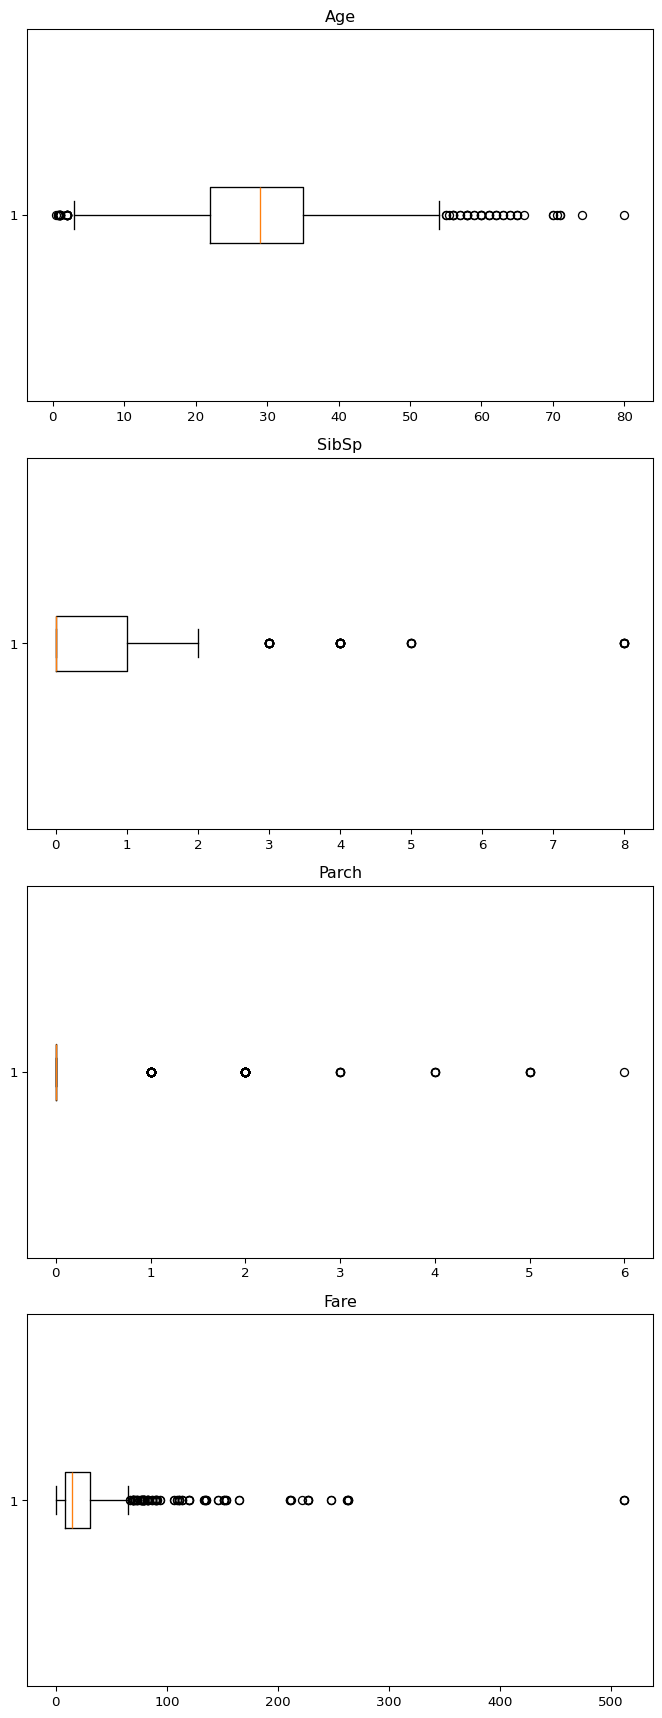

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [298]:
#Identify outliers

numerical_input_list = dataset.select_dtypes(include=np.number).columns.tolist()
for item in ('Survived','Pclass'):
    numerical_input_list.remove(item)

fig, ax = plt.subplots(len(numerical_input_list), 1, figsize=(7, 18), dpi=96)
for i, col in enumerate(numerical_input_list):
    ax[i].boxplot(dataset[col], vert=False)
    ax[i].set_title(col)
plt.tight_layout()
plt.show()

dataset.info()

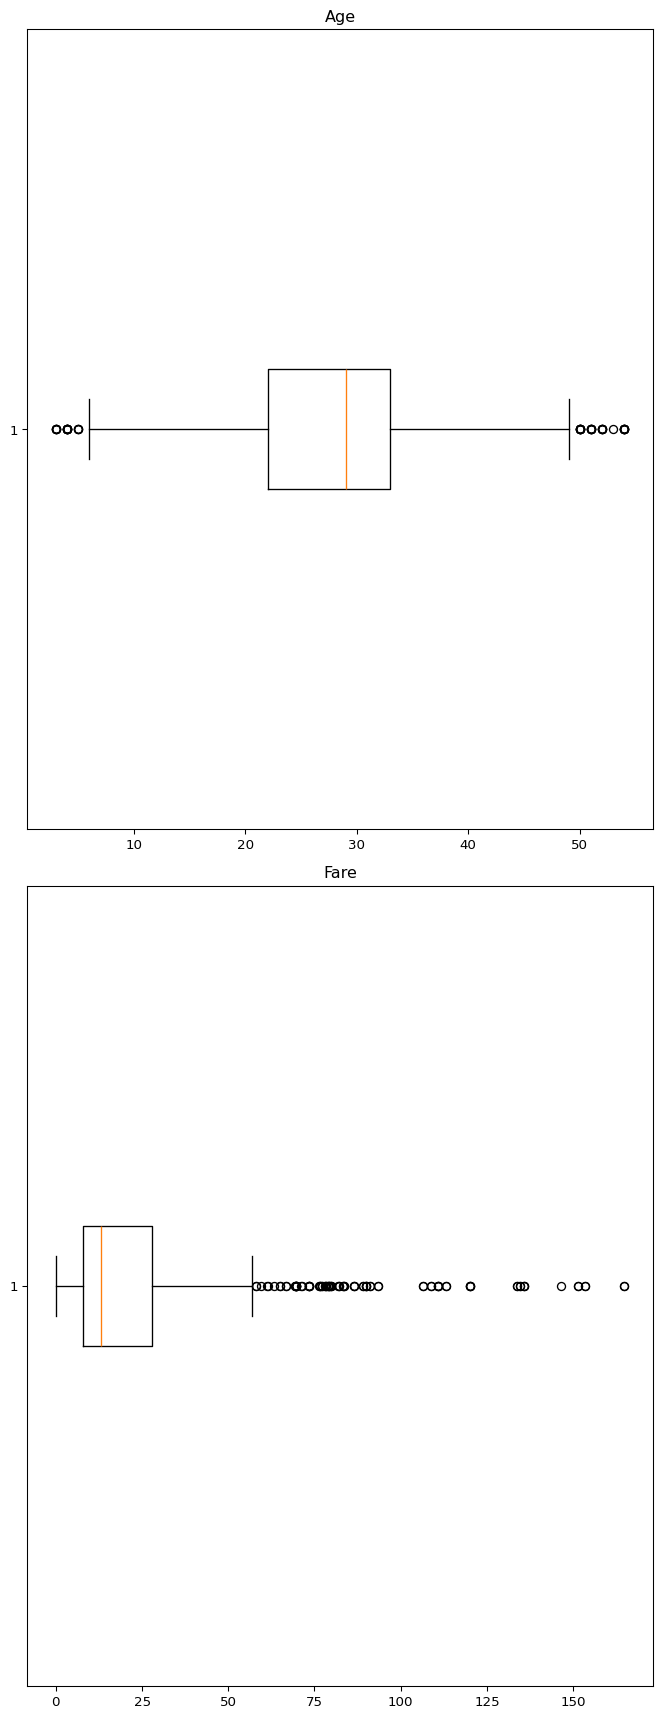

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  805 non-null    int64  
 1   Pclass    805 non-null    int64  
 2   Sex       805 non-null    object 
 3   Age       805 non-null    float64
 4   SibSp     805 non-null    int64  
 5   Parch     805 non-null    int64  
 6   Fare      805 non-null    float64
 7   Embarked  805 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.4+ KB


In [299]:
#Remove outliers

outlier_adjustments = [('Age',1.5),('Fare',7.5)]

for column in outlier_adjustments :
    exec(f"{column[0]}Q1 = np.percentile(dataset['{column[0]}'],25)")
    exec(f"{column[0]}Q3 = np.percentile(dataset['{column[0]}'],75)")
    exec(f"{column[0]}IQR = {column[0]}Q3 - {column[0]}Q1")
    exec(f"{column[0]}_upper = {column[0]}Q3 + {column[1]}*{column[0]}IQR")
    exec(f"{column[0]}_lower = {column[0]}Q1 - {column[1]}*{column[0]}IQR")

for column in outlier_adjustments :
    exec(f"dataset = dataset[(dataset['{column[0]}'] >= {column[0]}_lower) & (dataset['{column[0]}'] <= {column[0]}_upper)]")
    exec(f"del {column[0]}Q1, {column[0]}Q3, {column[0]}IQR, {column[0]}_upper, {column[0]}_lower")

dataset = dataset.reset_index(drop=True)

fig, ax = plt.subplots(len(outlier_adjustments), 1, figsize=(7, 18), dpi=96)
for i, col in enumerate(outlier_adjustments):
    ax[i].boxplot(dataset[col[0]], vert=False)
    ax[i].set_title(col[0])
plt.tight_layout()
plt.show()

dataset.info()

In [300]:
#Scale and Encode data

for column in numerical_input_list:
    exec(f"dataset['{column}'] = dataset['{column}']/dataset['{column}'].max()")

encode_list = ['Pclass','Sex','Embarked']
dataset = pd.get_dummies(dataset,columns=encode_list)

dataset.info()
dataset.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    805 non-null    int64  
 1   Age         805 non-null    float64
 2   SibSp       805 non-null    float64
 3   Parch       805 non-null    float64
 4   Fare        805 non-null    float64
 5   Pclass_1    805 non-null    bool   
 6   Pclass_2    805 non-null    bool   
 7   Pclass_3    805 non-null    bool   
 8   Sex_female  805 non-null    bool   
 9   Sex_male    805 non-null    bool   
 10  Embarked_C  805 non-null    bool   
 11  Embarked_Q  805 non-null    bool   
 12  Embarked_S  805 non-null    bool   
dtypes: bool(8), float64(4), int64(1)
memory usage: 37.9 KB


,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0.407407,0.125,0.0,0.043975,False,False,True,False,True,False,False,True
1,1,0.703704,0.125,0.0,0.432369,True,False,False,True,False,True,False,False
2,1,0.481481,0.000,0.0,0.048069,False,False,True,True,False,False,False,True
3,1,0.648148,0.125,0.0,0.322078,True,False,False,True,False,False,False,True
4,0,0.648148,0.000,0.0,0.048827,False,False,True,False,True,False,False,True


In [301]:
dataset.to_csv('edited-data\\titanic_data.csv', index=False)